In [16]:
!ls -l traces-sc128-10000-6100.bin

-rw-rw-r-- 1 haneul haneul 488000008  7월 16 01:59 traces-sc128-10000-6100.bin


In [17]:
import struct
import numpy as np
import matplotlib.pyplot as plt

In [18]:
with open("traces-sc128-10000-6100.bin", "rb") as f:
    N, = struct.unpack('<I', f.read(4))
    print(f"N: {N}")
    L, = struct.unpack('<I', f.read(4))
    print(f"L: {L}")
    traces = []
    for n in range(N):
        traces.append(np.array(struct.unpack('<' + 'd' * L, f.read(L * 8)), dtype=np.float64))
    traces = np.array(traces)

N: 10000
L: 6100


In [19]:
traces.shape

(10000, 6100)

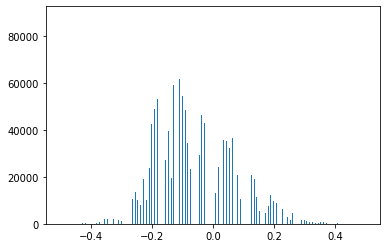

In [23]:
plt.hist(traces[:10000, 1550:3000].flatten(), bins=4000)
plt.show()

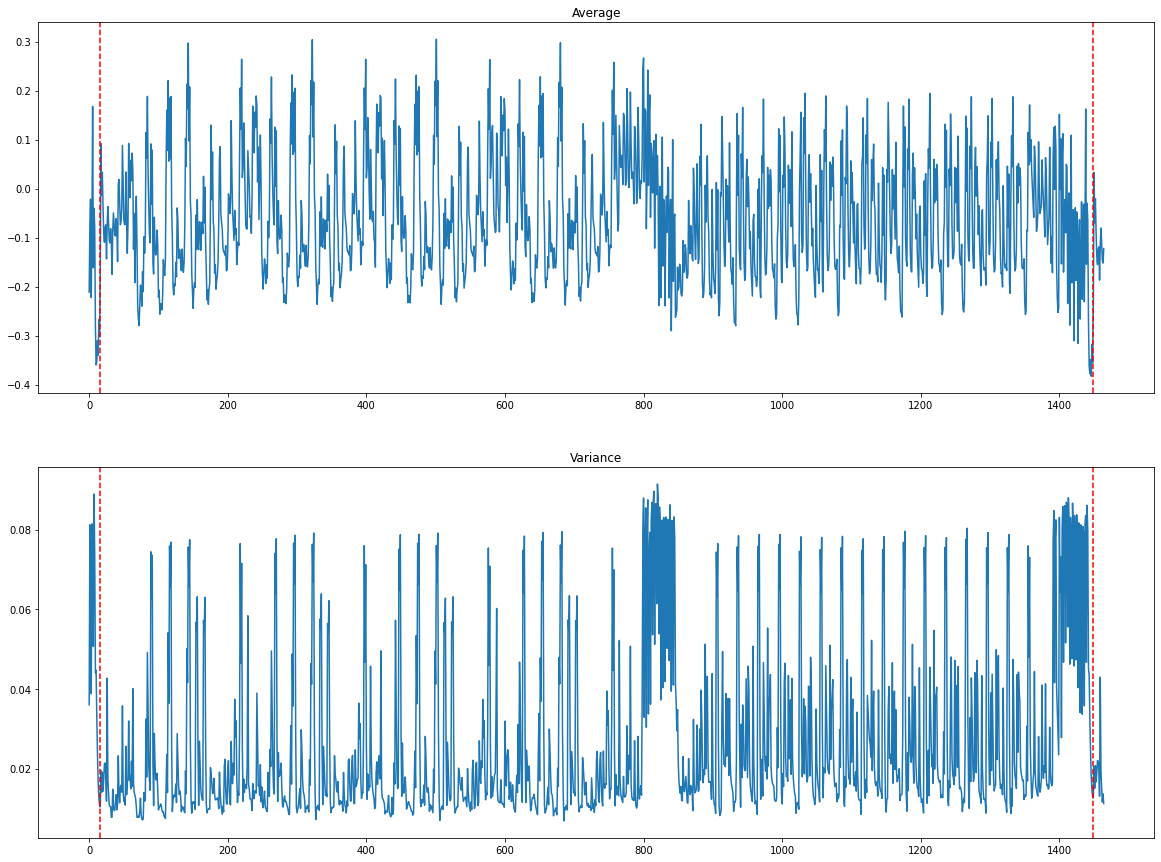

In [72]:
roiL, roiR = 1550, 3015
segL, segR = 1565, 2999
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

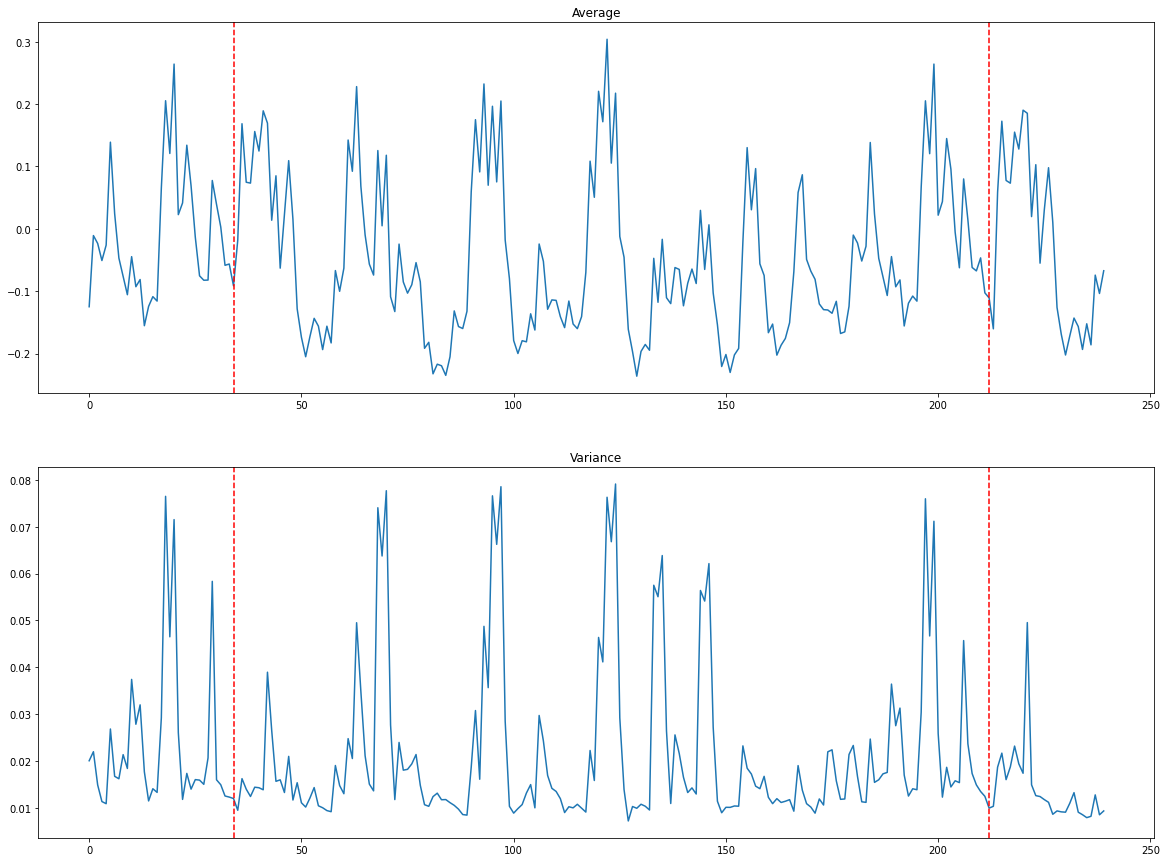

In [80]:
roiL, roiR = 1750, 1990
segL, segR = 1565+219, 1565+397
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

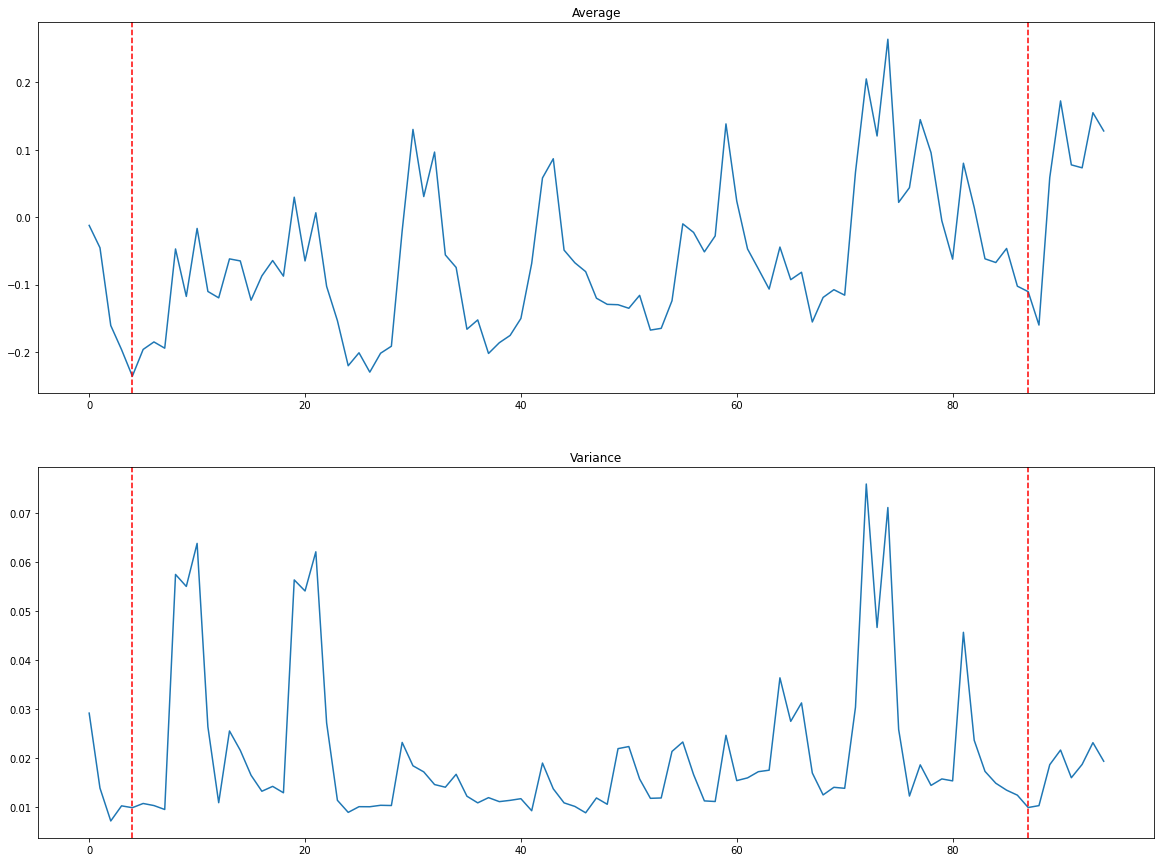

In [90]:
roiL, roiR = 1875, 1970
segL, segR = 1565+219+95, 1565+397
plt.figure(figsize=(20,15))
plt.subplot(2, 1, 1)
plt.title('Average')
plt.plot(np.average(traces, axis=0)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.subplot(2, 1, 2)
plt.title('Variance')
plt.plot(np.std(traces, axis=0, ddof=1)[roiL:roiR])
plt.axvline(segL - roiL, color='r', linestyle='--')
plt.axvline(segR - roiL, color='r', linestyle='--')
plt.show()

In [186]:
np.argsort(np.var(traces[:, roiL:roiR], axis=0))[::-1]

array([72, 74, 10, 21,  8, 19,  9, 20, 73, 81, 64, 66, 71,  0, 65, 22, 11,
       75, 13, 59, 82, 55, 29, 93, 50, 49, 90, 14, 54, 94, 42, 92, 89, 77,
       30, 63, 83, 62, 31, 67, 34, 56, 15, 91, 61, 79, 51, 60, 80, 84, 32,
       78, 17, 33, 69,  1, 70, 43, 85, 16, 18, 68, 86, 76, 35, 37, 47, 53,
       52, 40, 23, 39, 57, 58, 38, 12, 36, 44,  5, 48, 27, 28,  6, 88,  3,
       45, 25, 26, 87,  4,  7, 41, 24, 46,  2])

In [191]:
import scipy.signal

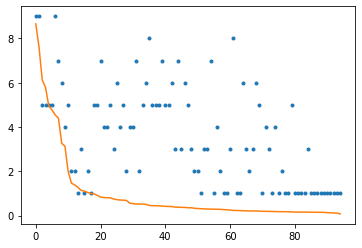

In [281]:
n_modes = []
for i in np.argsort(np.var(traces[:, roiL:roiR], axis=0))[::-1] + roiL:
    data = np.histogram(traces[:, i], bins=300, density=True)[0]
    # plt.plot(data)
    data = scipy.signal.convolve(data, scipy.signal.windows.gaussian(50, 5))
    # plt.plot(data)
    n_modes.append(len(scipy.signal.find_peaks(data, height=2, distance=10)[0]))

plt.plot(n_modes, '.')
plt.plot(1500*np.var(traces[:, roiL:roiR], axis=0)[np.argsort(np.var(traces[:, roiL:roiR], axis=0))[::-1]])

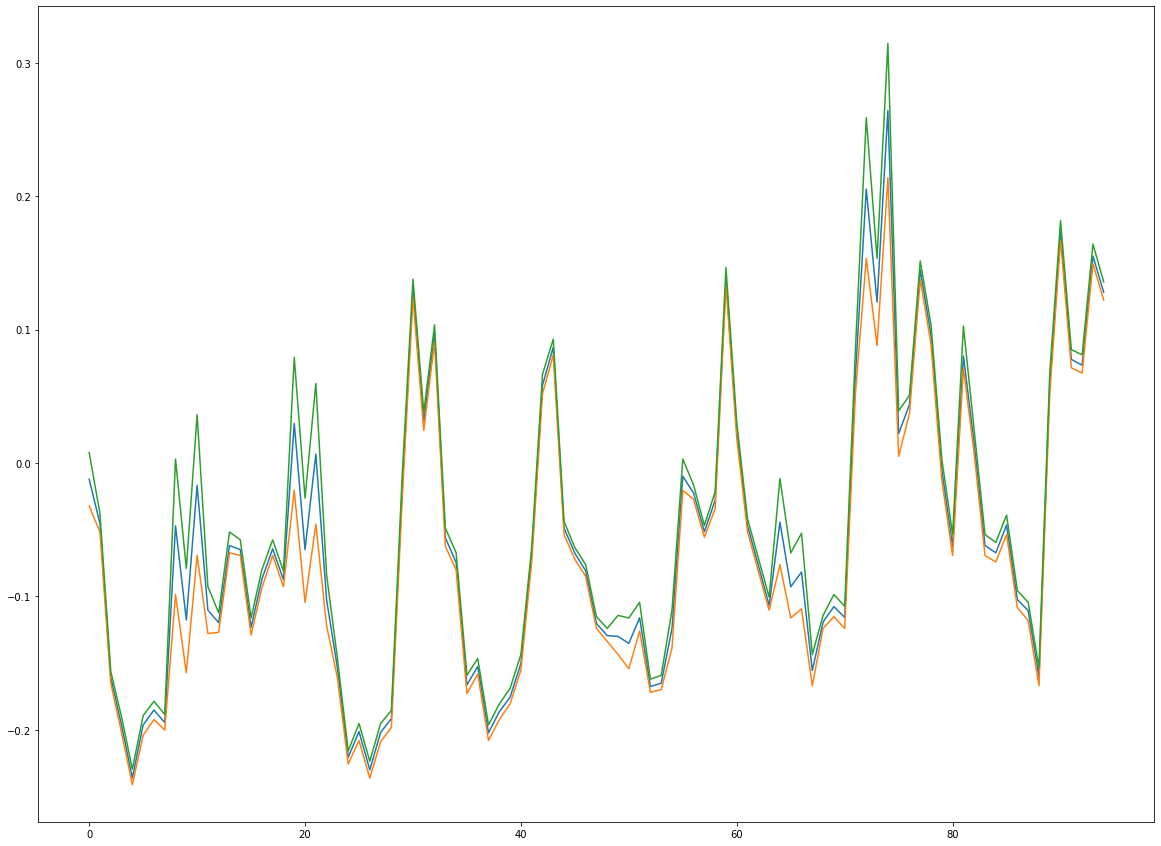

In [44]:
roiL, roiR = 1875, 1970
segL, segR = 1565+219+95, 1565+397
plt.figure(figsize=(20,15))
plt.plot(traces[:, roiL:roiR].mean(axis=0))
plt.plot(np.quantile(traces[:, roiL:roiR], q=0.25, axis=0))
plt.plot(np.quantile(traces[:, roiL:roiR], q=0.75, axis=0))
plt.show()

In [ ]:
73, 20,  9, 19,  8, 21, 10, 74, 72

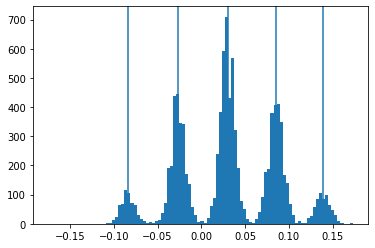

In [183]:
from scipy.stats import binom
sig = traces[:, roiL + 19]
plt.hist(sig, bins=100)
n = 4
p = 0.5
for x in [np.quantile(sig, binom.cdf(i, n, p) - binom.pmf(i, n, p) / 2) for i in range(0, n+1)]:
    plt.axvline(x)
plt.show()

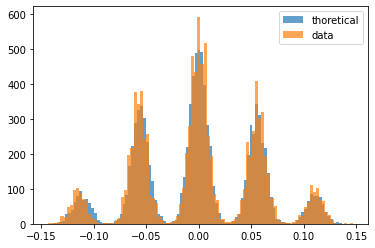

In [147]:
from scipy.stats import binom, norm
sig = traces[:, roiL + 8]
sigma = np.std(sig[(-0.08 < sig) & (sig < -0.015)])
num_samples = 10000
plt.hist(norm(loc=0, scale=sigma).rvs(num_samples) + (a - b) * (binom(n, p).rvs(num_samples) - 2), bins=100, alpha=0.7, label='thoretical')
plt.hist((sig - sig.mean()), bins=100, alpha=0.7, label='data')
plt.legend()
plt.show()

0.008169001936766326


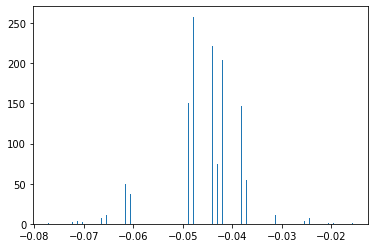

In [130]:
sig = traces[:, roiL + 8]
plt.hist(sig[(-0.08 < sig) & (sig < -0.015)], bins=1000)
print(np.std(sig[(-0.08 < sig) & (sig < -0.015)]))
plt.show()